[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t6_regression_solution.ipynb)


# A Supervised Learning Example: The linear Regression Model
<hr>

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## The California Housing data set

The "California Housing" data set is a widely used data set to demonstrate forecasting methods. As the name suggests, the data set concerns the valuation of real estate. It comprises socio-demographic information concerning the area of a property and a dependent (aka target) variable, which gives the median house value for California districts. This data was derived from the 1990 U.S. census. 

Being so popular, the data set is readily available in standard Python libraries. 

In [2]:
# Downloading the data set
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)  # get the data as a Pandas dataframe

print(california_housing.DESCR)  # the data even comes with a nice description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The `sklearn` library provides the data in a specific format. Feature values and the target variable are already separated. The be consistent with our standard notation, we extract the data and store it, as usual, in variables $X$ and $y$. Of course, this is a good opportunity to also take a quick look into the data.

In [3]:
X = california_housing.data
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y = california_housing.target
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Descriptive Statistics

In [5]:
# compute descriptive statistics that summarize the 
# target's distribution
y.describe()  

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [6]:
X.describe() # do the same for all features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### Explanatory data analysis
To better understand the data, we consider the standard EDA operations introduced in the previous practical. They comprise the analysis of histograms and/or box-plots of the target and the features. 

Contrary to the previous demo in which our target variable was a binary class indicator, our target in the house value estimation setting is a real number. Therefore, we plots with grouping to, e.g., depict the distribution of a feature across different values of the target are inapplicable. Instead, we consider the (linear) correlation between features and the target to obtain some initial evidence as to which features might be important. 

While we only create the plots in the following, never forget that each plot and more generally every result deserves a careful analysis and discussion. Therefore, make sure to examine each plot and note down your key observations.

#### Target Variable: Medium House Value

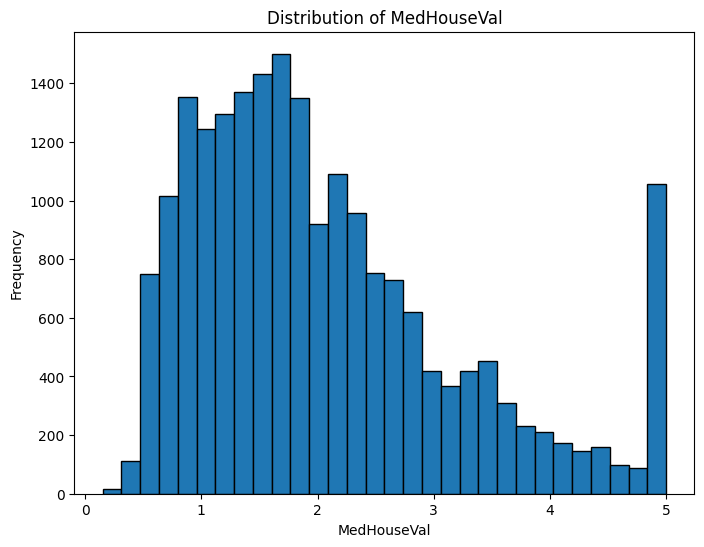

In [7]:
# Histogram of target 
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='k')
plt.xlabel(y.name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {y.name}')
plt.show()

#### Features

The easiest way to produce a visualization of the distribution of all features is to call a `Matplotlib` plotting function via the data frame object. For example, to create a histogram of all (numerical) columns in the data frame, you can call:

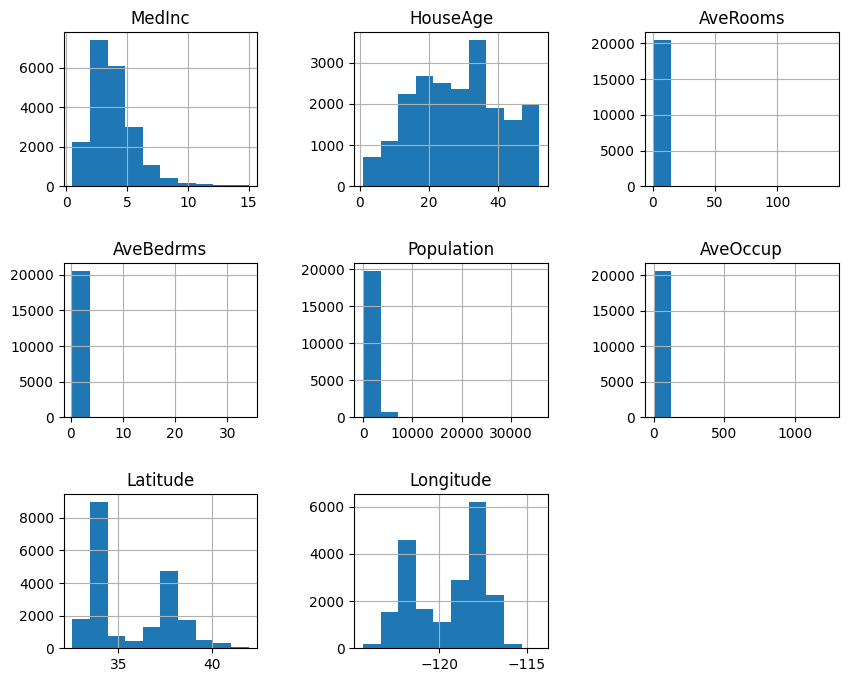

In [8]:
X.hist(figsize=(10,8))  # Increase figure size size the call will produce many sub-plots
plt.subplots_adjust(wspace=0.5,hspace=0.5)  # adjust the spacing of the sub plots
plt.show()

Being so convenient, it is tempting to use the same approach for other plots such as, for example, creating a boxplot of all features. However, this is less useful, as the below example shows. 

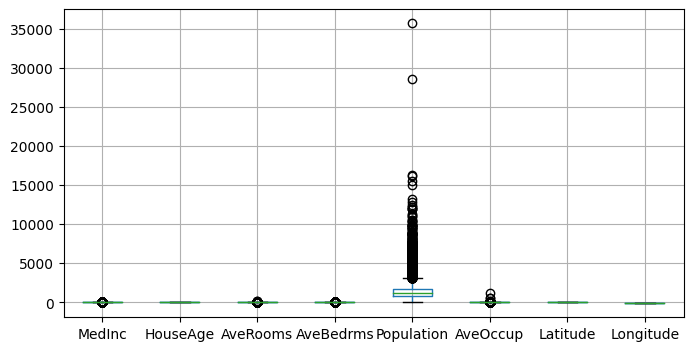

In [9]:
# Boxplot of all features in a data frame
X.boxplot(figsize=(8,4)) 
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

So the problem lies in the different scale of the features. By default, `Pandas` uses a shared y-axis for all features. This renders the plot unreadable. We could remedy the problem that the feature values have different scale by first normalizing the feature values as discussed in the lecture on [Explanatory Data Analysis](https://moodle.hu-berlin.de/pluginfile.php/5910736/mod_resource/content/2/ipml_s3_eda.pdf). 

Alternatively, to create a boxplot for all (numerical) features, we can simply write a loop and plot each feature individually. This would nicely work when using `Matplotlib` but since we have to write a bit more code anyway, and obtain more control over our individual plots, we use `seaborn` in the below example.

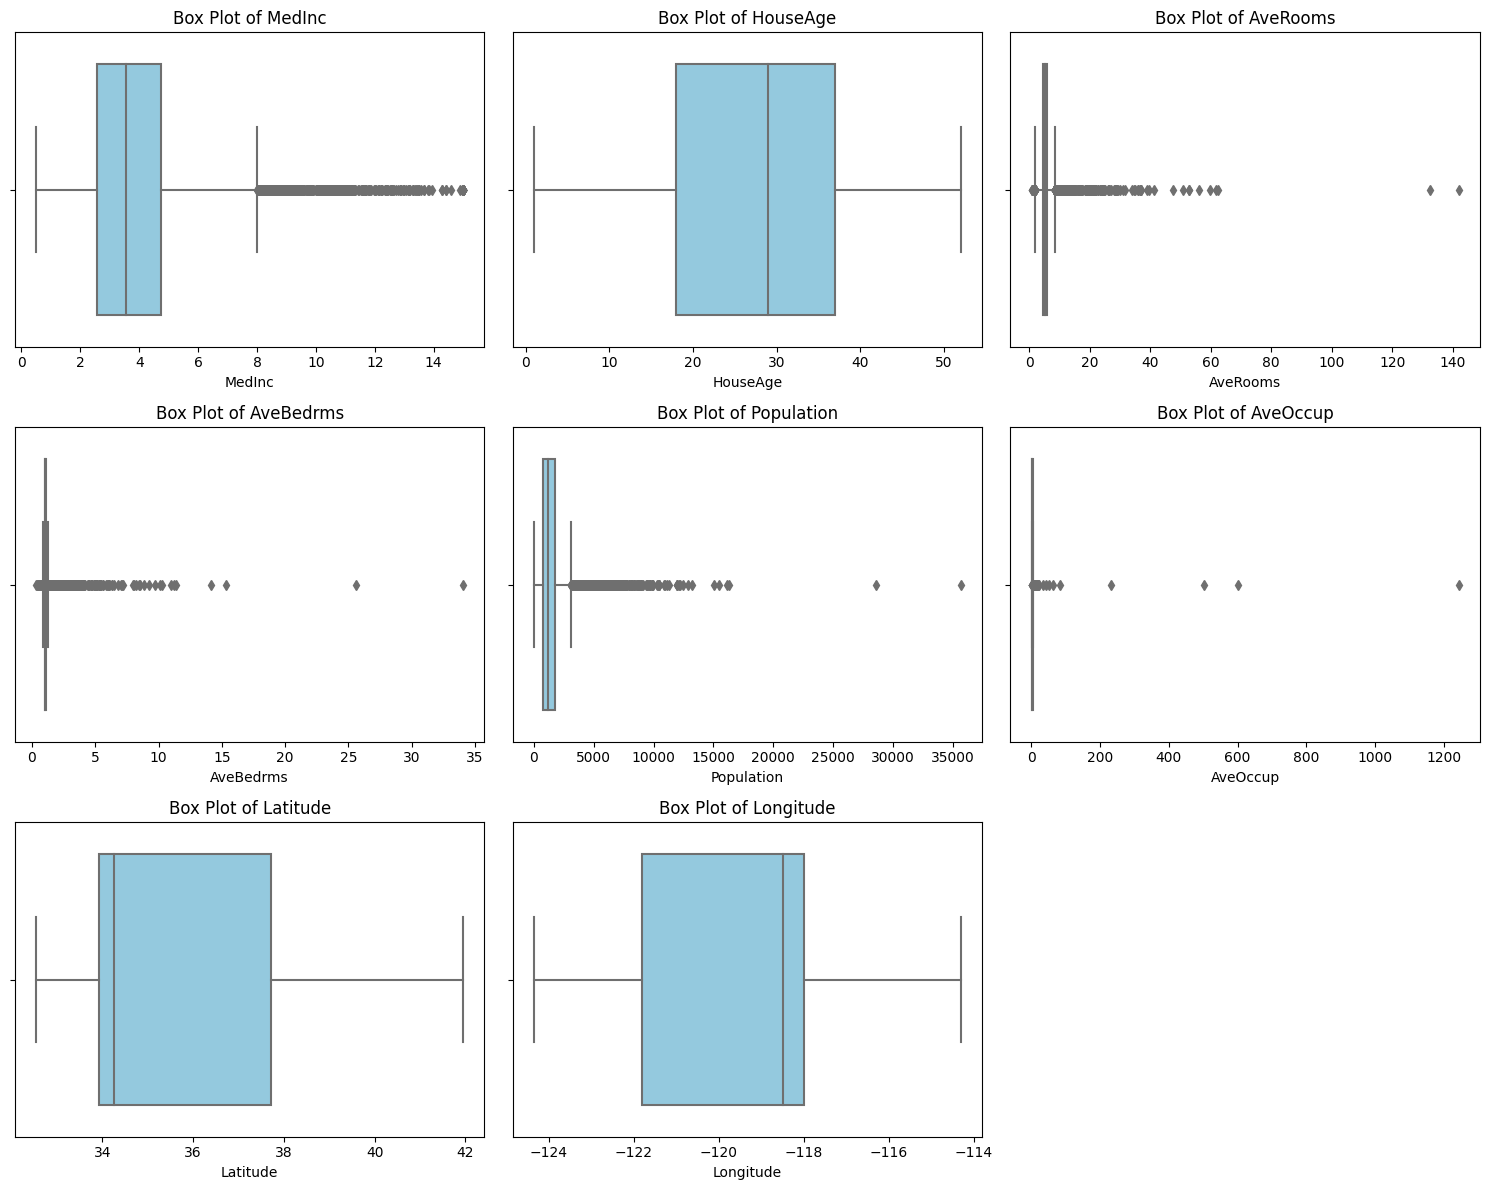

In [10]:
#3x3 matrix of box-plots for all the features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Create a 3x3 grid of subplots
axes = axes.flatten() # Flatten the axes for easier iteration

# Loop through each feature and create a box plot
for i, feature in enumerate(X.columns):
    sns.boxplot(x=X[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove empty subplots
for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout
plt.show()

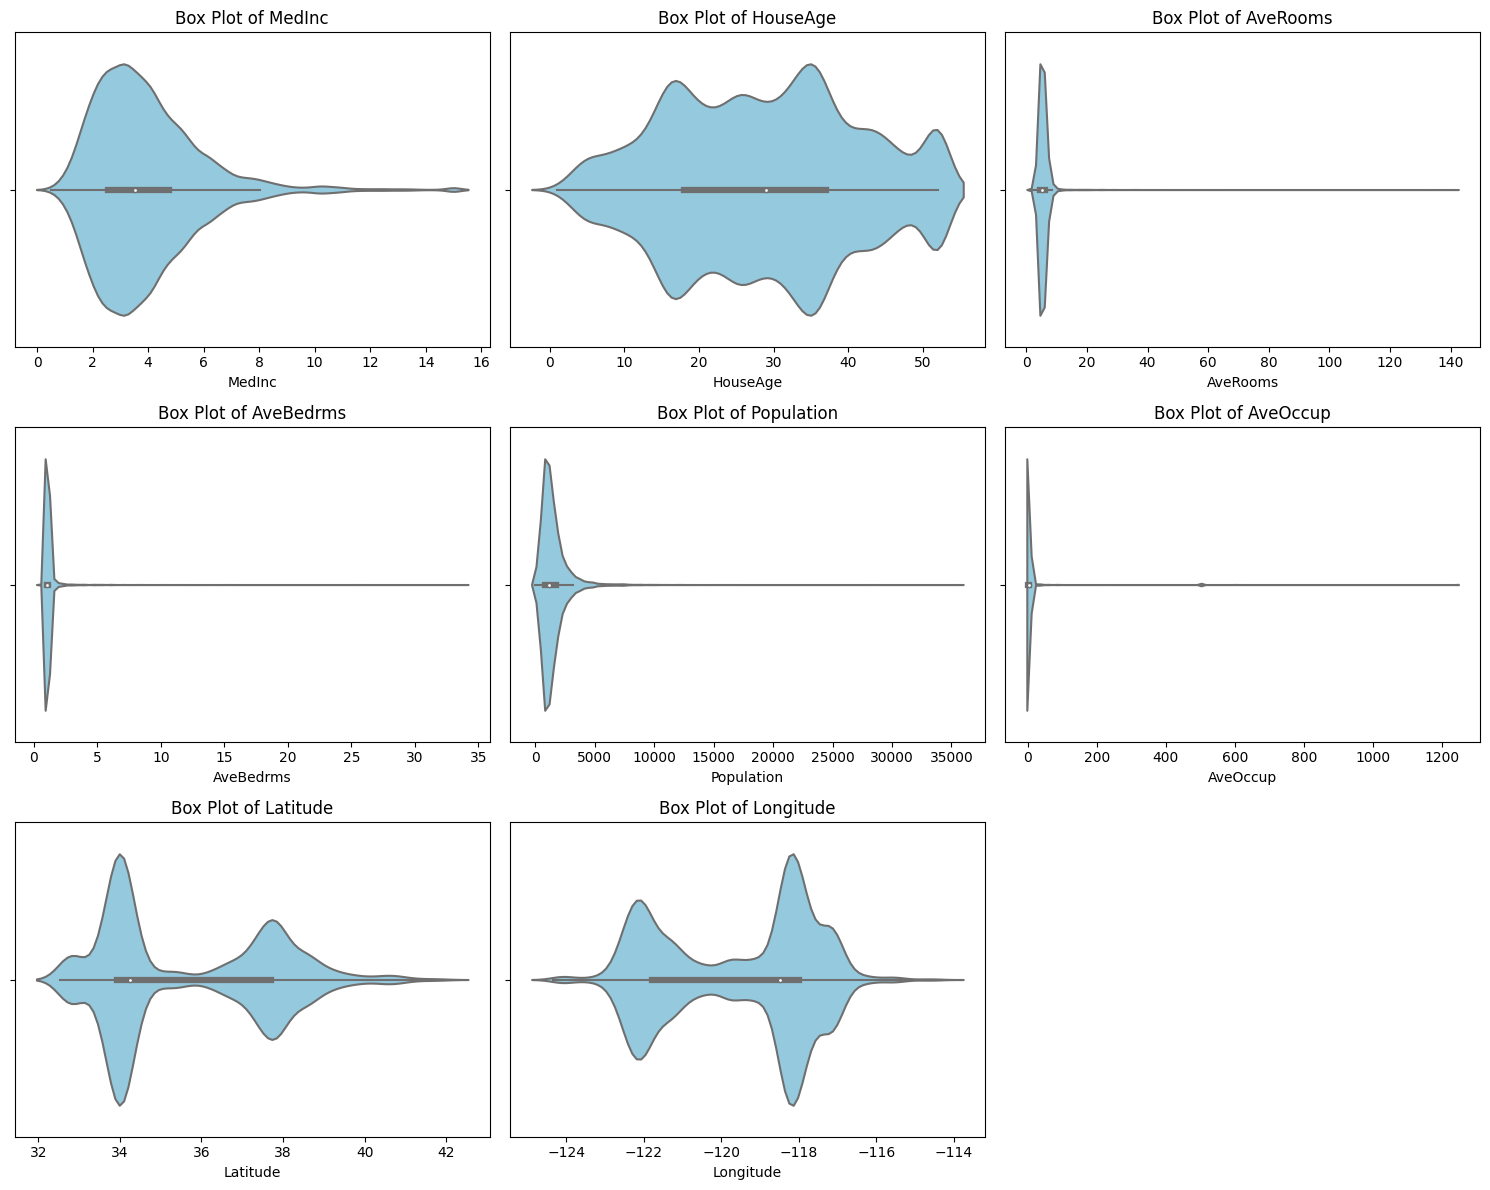

In [11]:
#3x3 matrix of box-plots for all the features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Create a 3x3 grid of subplots
axes = axes.flatten() # Flatten the axes for easier iteration

# Loop through each feature and create a box plot
for i, feature in enumerate(X.columns):
    sns.violinplot(x=X[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove empty subplots
for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout
plt.show()

#### Correlation analysis
Having obtained an idea about the *univariate* distributions, we also take a look at the correlation structure in the data. For start, we consider the *Pearson* correlation coefficient, which we can compute for all pairs of features.

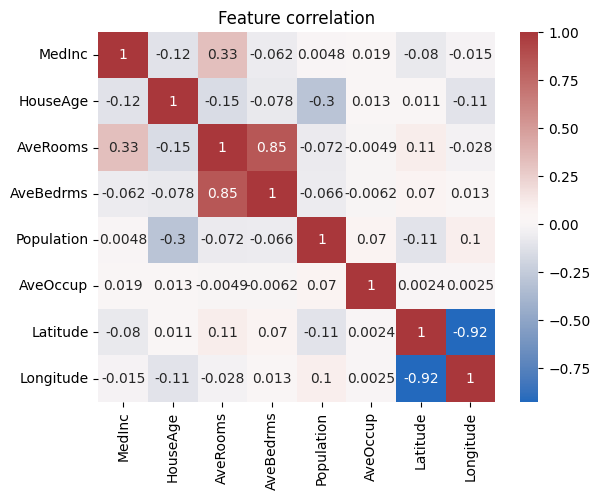

In [12]:
# Correlation among the features
corr_matrix = X.corr()  
sns.heatmap(corr_matrix, cmap='vlag', annot=True)
plt.title('Feature correlation')
plt.show()

A powerful way to obtain more insight into the dependency structure of features is the `pairplot()`, which integrates a visualization of individual feature's distribution and their association. The latter is depicted using scatter plots.

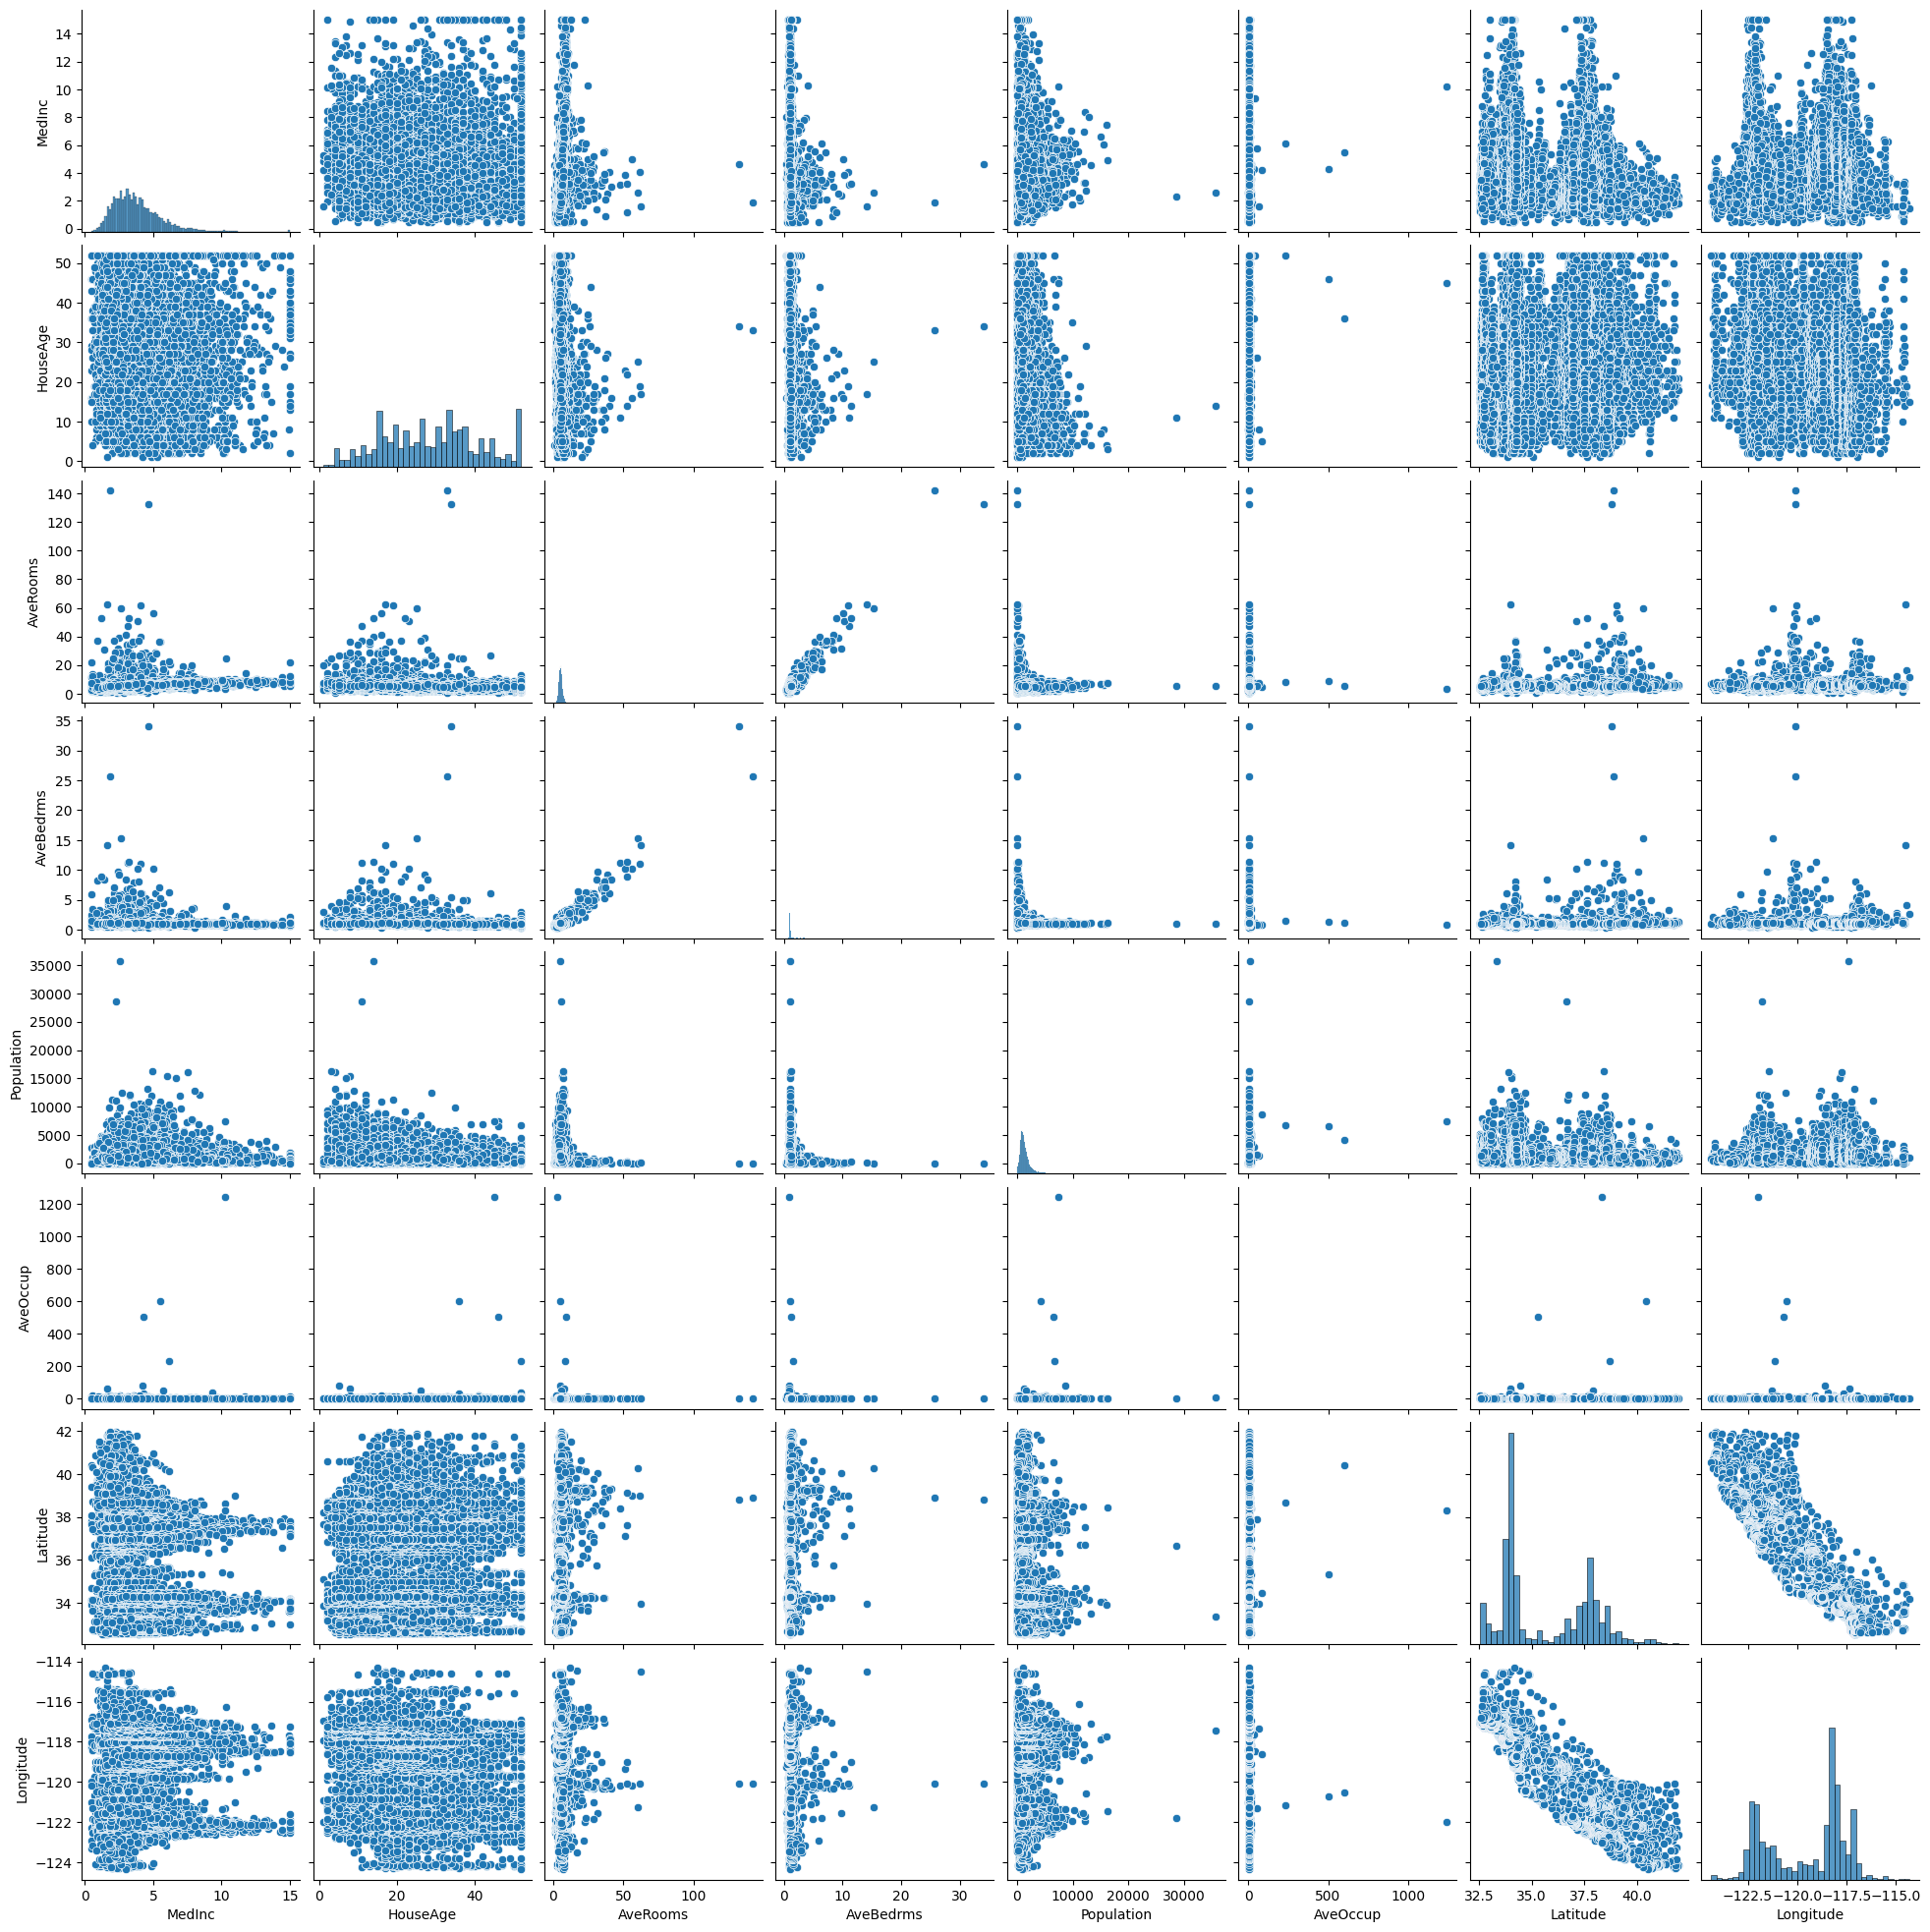

In [13]:
sns.pairplot(data=X)
plt.show()

Finally, it is also interesting - and in fact essential - to examine the correlation between features and the target variable. Since our target column is no longer part of the data frame, we can calculate (and visualize) this correlation as follows:

Text(0.5, 0, 'Correlation')

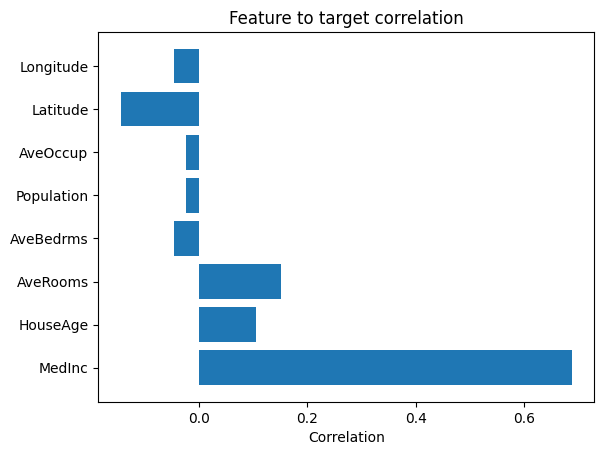

In [14]:
# Correlation between individual features and the target
rho = X.corrwith(y)
# Visualization by means of a bar plot 
plt.barh(X.columns.tolist(), rho)
plt.title('Feature to target correlation')
plt.xlabel('Correlation')

## Linear Regression
Having completed our initial data screening and explorative analysis, we proceed by estimating a linear regression model to deepen our understanding of how the features and the target are related to another.

To that end, we consider the library `statsmodels`, a popular and powerful library for statistical modeling, which includes ordinary least squares (OLS) estimator. We provide all codes for the model estimation below.

In [15]:
import statsmodels.api as sm 

# OLS model estimation
lr_main = sm.OLS(y,
               sm.add_constant(X)  # include an intercept
              ).fit() 

The library provides a neat function, `.summary()` to obtain a concise overview of the results of regression analysis. It includes key information like R-squared, estimated coefficients, standard errors, and p-values. This summary is crucial for evaluating model adequacy and feature significance.

In [16]:
print(lr_main.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:31:34   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

# Exercises
Based on the above analysis, draw on your data science expertise to answer the following questions: 

## 1. What is the most and the least important feature?
Briefly note what statistics/results you have considered to make your choice.

**Your answer:**


## 2. Scatter Plots
Create, for each of the selected features, a scatter plot of the selected feature against the target. Display these plots in a 1x2 grid

In [17]:
# Code for plotting


## 3. Model Reestimation
Remove the least important feature from the data and reestimate the model. Briefly discuss whether this step has improved the model.

In [34]:
# Code to reestimate the model using a new data set
X_new = sm.add_constant(X.drop(columns=['Population']))
model = sm.OLS(y, X_new)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:32:11   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.0

**Did the model improve? Briefly discuss:**

## EXTRA: Backward Elimination 
Relying on the following pseudo code, implement a *backward elimination* procedure, in which you repetitively discard the least important feature from the model.

```
    Use all features as the current set of features  
    Do 
        Estimate a regression model using current set of features
        Store model performance in terms of a suitable statistic
        Identify the least important feature
        Discard that feature from current set of features
    Repeat untill all features but one have been deleted

```
Depict your results graphically by plotting the number of features in the regression model against model performance using the same statistic as in your backward elimination algorithm.
>Hint: given you have to run the code inside the above *Do ... Repeat* block multiple times, consider implementing this part as a custom function.

In [65]:
# Backward elimination code:
# ---------------------------------------------------------------

def backward_elimination(X, y):
    original_features = X.columns.tolist()
    current_features = original_features.copy()
    performance_records = []

    while len(current_features) > 1:
        X_with_const = sm.add_constant(X[current_features])
        model = sm.OLS(y, X_with_const).fit()
        performance = {'features': current_features.copy(), 'AIC': model.aic.round(1)}

        # Finding the least important feature (lowest absolute t-value)
        t_values = model.tvalues[1:]  # excluding the constant term
        worst_feature = t_values.abs().idxmin()
        current_features.remove(worst_feature)

        performance_records.append(performance)

    return performance_records

In [66]:
# Run the backward elimination procedure
performance_records = backward_elimination(X, y)

# Display the results
for record in performance_records:
    print(f"Features: {record['features']}, AIC: {record['AIC']}")

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], AIC: 45265.5
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude'], AIC: 45264.2
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], AIC: 45324.0
Features: ['MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude'], AIC: 45643.6
Features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude'], AIC: 45887.7
Features: ['MedInc', 'Latitude', 'Longitude'], AIC: 46376.3
Features: ['MedInc', 'Latitude'], AIC: 50934.7


## 5. Switching the Library
We have used `statsmodels` up to this point. However, the go-to library when it comes to machine learning is a different library called [scikit-learn](https://scikit-learn.org/stable/), typically abbreviated as sklearn.

Import that library. Then, using once more the data set with all features included, create another linear regression model using the class `linear_model.LinearRegression()`. Compare the coefficients between this model and the one we estimated above using `statsmodels.api.OLS`. They should be pretty much identical. Please verify that they are.

In [20]:
# Code to estimate linear regression using sklearn.
from sklearn.linear_model import LinearRegression

sk_lr = LinearRegression().fit(X, y)

In [21]:
print(sk_lr.intercept_)
print(sk_lr.coef_)

-36.941920207184246
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


## 6. Prediction 
We next use our regression model for prediction. Feeding it with data on feature values, the estimated regression coefficients facilitate forecasting real-estate prices. More specifically, the lecture has introduced you to the process of evaluating prediction performance and its key ingredients, indicators of forecast accuracy and practices to organize available data so as to mimic a real-world application of a model. 

<img alt="Holdout method" src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/holdout_method.png" width=600 height=800/>

As far as ingredient one is concerned, we will consider the mean squared error (MSE), defined as:<br> 
$ MSE = \frac{1}{n}\sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2 $, <br>
with:
- $n$ = number of data points
- $Y$ = true values of the target variable
- $\hat{Y}$ = forecasts of the regression model

> Hint: if unsure how to implement the MSE yourself, you can be sure that ready-made functions are available to do it for you

As the equation shows, given a trained (regression) model, we need a way to compute predictions $\hat{Y}$. Your first task is to find a suitable function for this task. Use web-search, ask ChatGPT, or use some other way of your liking. Once you found a suitable function, write some code to try it out and understand how, in general, it works.

In [22]:
# Your code to compute model predictions
preds = sk_lr.predict(X)

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, preds)

0.5243209861846072

Now that we know how, in principle, we can apply a trained model to (novel) data, we are ready to properly assess the model's accuracy. As shown by the above picture, this entails applying the model to some data, called the test in the above picture, then comparing model predictions to actual values of the target variable, and then aggregating the residuals using some error measure. We already agreed on using the MSE for the last step. Hence, unsurprisingly, your next task is implement the **holdout method**, which the picture shows. Specifically, write code to: 
1. Randomly split your data into a training set (70%) and a test set (30%)
2. Train a regression model using the training set
3. Compute forecasts for the test set
4. Compute the test set MSE of the regression model

> Hint: you have seen allmost everythihg that it takes to solve this task. The only missing bit is the partitioning of the data. You could write code to do it *manually* but given that this kind of data splitting is super common, there must be a ready-to-use function to do it and, as always, the real task is to find the right function to do the job.

In [24]:
# 1. Randomly split your data into a training set (70%) and a test set (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=11)

In [25]:
# 2. Train a regression model using the training set
sk_lr = LinearRegression().fit(X_train, y_train)

In [26]:
# 3. Compute forecasts for the test set
y_pred = sk_lr.predict(X_test)

In [27]:
# 4. Compute the test set MSE of the regression model
mse = mean_squared_error(y_test, y_pred)
mse

0.5372046278603465

Try to interpret the test set MSE of the model. What does the obtained value tell you?

Hopefully, thinking about this question has reminded you of the lecture, in which we discussed how the MSE is difficult to interpret. Therefore, compute the root mean-square error $\sqrt{MSE}$ and interpret this quantity. Do you agree that it is easier to interpret? 

In [28]:
# Compute RMSE of the regression model
print('RMSE of the regression models is: {}'.format(np.sqrt(mse)))

RMSE of the regression models is: 0.7329424451212704


**Your interpretation of the RMSE:**


# 7. Cross-validation
The MSE of the regression model gives us a solid estimate of how well the model predicts medium house values, that is our target. Before diving into more advanced means of forecast accuracy evaluation, let's take a step back and check whether the assessment of the model on a holdout data set was necessary in the first place. To that end, write code to compute the training set RMSE of the model.

In [29]:
# Helper function
def rmse(y_true, yhat):
    """ Helpfer function to calculate root mean-square error """
    mse = mean_squared_error(y_true=y_true, y_pred=yhat)
    return np.sqrt(mse)

# Compute training set predictions
y_hat_train = sk_lr.predict(X_train)

rmse_train = rmse(y_train, y_hat_train)
print('Training set RMSE of the regression models is {}'.format(rmse_train))

Training set RMSE of the regression models is 0.7208491543530854


It is worth thinking about and discussing why the *training set* RMSE might not differ that much from the *test set* RMSE. This discussion, however, is out of the scope of this tutorial. Kindly accept that our result is a special case and that it would be very wrong to conclude that an evaluation of forecast accuracy on *fresh* data using the holdout method is dispensable. If you'd like to know more, we invite you to ask ChatGPT for its perspective on the matter. The very task of phrasing a suitable prompt would be an excellent exercise to help you to advance your ML skills. 

Provided we accept that we routinely assess forecast accuracy using out-of-sample data (that is any data but the training set), we should examine how the standard way to undertake this assessment. Entry k-fold cross-validation, which the lecture introduced as the process of randomly partitioning a data set into $k$ disjoint parts, training a model on the union of $k-1$ parts of the data, assessing the resulting model on the left out part, and repeating the process $k$ times while selecting a different part of the data as validation fold in each run: 
<br>

<img alt="Cross-validation" src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/cross_validation1.png" width=600 height=800/>

<br>
Once the process of training and assessing $k$ models has been completed, we can integrate the out-of-sample predictions and compute the cross-validation error of the model on the resulting data.
<br><br>

<img alt="Cross-validation-based performance assessment" src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/cross_validation2.png" width=600 height=800/>
<br>

The `sklearn` library supports k-fold cross-validation in several ways. Generally speaking, these options differ in how much flexibility they leave you to adjust the code and how easy they are to use. In this notebook, we begin the perhaps easiest approach toward cross-validation. To that end, we use the function `cross_val_score()` which is available in the module `sklearn.model_selection`.

In [30]:
# Import the function cross_val_score from the sklearn module sklearn.module_selection
from sklearn.model_selection import cross_val_score

In [31]:
# Study the documentation of the function cross_val_score to understand how to use it and compute the cross-validation performance of your regression model using that function.
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [32]:
rmse_cv = cross_val_score(estimator=LinearRegression(), 
                X=X,  # Note how we must use the entire data set here, as the function does the partitioning internally and would otherwise cross-validate the training data
                y=y,
                cv=10,  # Ten-fold cross-validation
                scoring='neg_root_mean_squared_error'  # Specify the accuracy indicator explicitly 
               )
# The cross_val_score function assumes that we use accuracy measures; not error measures. Therefore, we have to multiply results by -1 to obtain estimates of the RMSE
rmse_cv = -1* rmse_cv
print('Cross-validation performance of the model in terms of RMSE:')
print(rmse_cv)
print('Average RMSE performance: {:.2f}'.format(np.mean(rmse_cv)))

Cross-validation performance of the model in terms of RMSE:
[0.69944301 0.65829982 0.94150821 0.62523308 0.86485438 0.72787552
 0.53664192 0.87935454 0.80190746 0.57228542]
Average RMSE performance: 0.73
